#                                    INTRODUCTION

The problem of water pollution or decreased water quality has become very huge that the existence of biodiversity and multiple human communities have been threatened. This is such bad that almost 1.5 million children have been reported to have died due to catching diarrhea in India. A World Bank report also shows that population reduces the growth of an economy. Thus, a high increase in water pollution the higher loss in economic growth of the economy.
For these reasons it is important for the ministry in charge of water and sanitation as well as the major stakeholders in providing water to know the quality of the water bodies and the quality of water they produce for the consumption of the people of India.
Improved water supply and sanitation, and better management of water resources, can greatly reduce illnesses such as cholera, diarrhea, dysentery, hepatitis A, typhoid, and polio. Consequently, the country's economic growth will be boosted leading to poverty reduction.

So, being motivated by the above reasons stated, we use this Water Quality dataset collected for India to understand what constitutes to safe, Potable water and apply machine learning models to classify the water according to the water quality index. This model can be used as an aid to help experts quickly determine water quality and make decisions as to whether it is good for human consumption.

## Table of Contents

* [1. Feature Description](#Features)
* [2. International Standard and weight for Water quality](#RECOMMENDED)
* [3. Import Libraries](#IMPORTLIB)
* [4. Load Data](#LoadData)
* [5. EDA](#EDA)
* [6. Feature Engineering](#FeatureEng)
* [7. Model Creation](#ModelC)
* [7.1 Water Quality Prediction](#Prediction)
* [7.2 Training and Testing Models](#TnTModels)
* [8. Using Saved Models](#SavedModels)


## 1. Feature Description <a class="anchor" id="Features"></a>

In [ ]:
1. **STATION CODE**

2. **LOCATION**

3. **STATE**

4. **TEMP**: Temperature of the water in degree celcius.
    
5. **DO**: Dissolved Oxygen in water.

6. **ph**: pH of 1. water (0 to 14).

7. **Conductivity**: Electrical conductivity of water.

8. **BOD**: Biological oxygen demand is the amount of oxygen consumed by bacteria in water
    
9. **NITRATES**: Nutrient nitrate in water.
    
10. **FECAL_COLIFORM**: they may indicate the presence of other pathogenic bacteria in water

## 2. RECOMMENDED STANDARD AND WEIGHT FOR WATER QUALITY PARAMETERS <a class="anchor" id="RECOMMENDED" ></a>

In [ ]:
#FEATURE   STANDARD    WEIGHT

#TEMP        30         0.05
#DO          6          0.27
#PH          8.5        0.19
#EC          300        0.01
#BOD         6          0.27
#NITRATE     45         0.04  
#FECAL_COLI  10         0.16

## 3. IMPORT LIBRARIES <a class="anchor" id="IMPORTLIB" ></a>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Modelling Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold


## 4. LOAD DATA <a class="anchor" id="LoadData" ></a>

In [39]:
df = pd.read_csv('waterquality.csv',engine='python')

In [3]:
df.head()

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [4]:
df.shape

(534, 11)

In [5]:
df.dtypes

STATION CODE             int64
LOCATIONS               object
STATE                   object
TEMP                   float64
DO                     float64
pH                     float64
CONDUCTIVITY           float64
BOD                    float64
NITRATE_N_NITRITE_N    float64
FECAL_COLIFORM         float64
TOTAL_COLIFORM         float64
dtype: object

## 5. EDA <a class="anchor" id="EDA" ></a>

In [6]:
#checking for missing values
df.isnull().sum()

STATION CODE            0
LOCATIONS               0
STATE                   0
TEMP                    5
DO                      2
pH                      0
CONDUCTIVITY           30
BOD                     6
NITRATE_N_NITRITE_N     2
FECAL_COLIFORM         82
TOTAL_COLIFORM         39
dtype: int64

Missing values do not occur at random. There maybe various reasons but we looked at it from the State point of view. With the 5 missing temperature values 4 were from Delhi and 1 from GUJARAT.
So we decide to fill all missing values with the median of values with the same STATE.
Example, we use delhi's median temperature value to fill missing delhi's temperature values. likewise we use Gujarat median temperature value to fill missing Gujarat temperature values.
This was done to fill all missing values

In [7]:
#Temperature has five missing values
np.where(pd.isnull(df['TEMP']))

(array([135, 136, 137, 142, 491], dtype=int64),)

In [8]:
#Printing out the rows where there are empty values
df.loc[lambda df: pd.isnull(df['TEMP']), :]

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
135,1120,"YAMUNA AT WAZIRABAD, DELHI, CPCB",DELHI,NaN,9.3,7.6,NaN,2.4,NaN,NaN,10003.0
136,1121,"YAMUNA AT NIZAMUDDIN, DELHI",DELHI,NaN,1.2,7.5,NaN,17.2,9.0,NaN,12010833.0
137,1375,"YAMUNA AT OKHLA BRIDGE (INLET OF AGRA CANAL), ...",DELHI,NaN,1.4,7.6,NaN,17.3,9.2,NaN,23816667.0
142,1812,YAMUNA AT OKHLA AFTER MEETING OF SHAHDARA DRAI...,DELHI,NaN,1.4,7.5,NaN,38.2,NaN,NaN,18580000.0
491,3206,MAHI AT SHERKHI BRIDGE,GUJARAT,NaN,4.2,8.7,NaN,0.3,0.0,NaN,NaN


In [9]:
#Checking how many states are in the data
df.STATE.unique()

array(['MAHARASHTRA', 'ANDHRA PRADESH', 'UTTARAKHAND', 'UTTAR PRADESH',
       'BIHAR', 'WEST BENGAL', 'ASSAM', 'KARNATAKA', 'HIMACHAL PRADESH',
       'DELHI', 'KERALA', 'TAMILNADU', 'MADHYA PRADESH', 'RAJASTHAN',
       'PUNJAB', 'GOA', 'CHHATTISGARH', 'GUJARAT'], dtype=object)

In [40]:
#calculate the Temperature median value of GUJARAT STATE
Temp_mv1 = df[df['STATE']=='GUJARAT'][['TEMP']].median()

In [41]:
#calculate the DO median value of UTTAR PRADESH STATE
DO_mv1 = df[df['STATE']=='UTTAR PRADESH'][['DO']].median()

In [42]:
#calculate the EC median value of MADHYA PRADESH, UTTARAKHAND and GUJARAT STATES
EC_mv1 = df[df['STATE']=='MADHYA PRADESH'][['CONDUCTIVITY']].median()
EC_mv2 = df[df['STATE']=='UTTARAKHAND'][['CONDUCTIVITY']].median()
EC_mv4 = df[df['STATE']=='GUJARAT'][['CONDUCTIVITY']].median()

In [43]:
#calculate the EC median value of MADHYA PRADESH and ANDHRA PRADESH STATES
BOD_mv1 = df[df['STATE']=='ANDHRA PRADESH'][['BOD']].median()
BOD_mv2 = df[df['STATE']=='MADHYA PRADESH'][['BOD']].median()

In [44]:
#calculate the FECAL COLI median value of ALL STATES with missing values
FC_mv1 = df[df['STATE']=='MADHYA PRADESH'][['FECAL_COLIFORM']].median()
FC_mv2 = df[df['STATE']=='UTTARAKHAND'][['FECAL_COLIFORM']].median()
FC_mv3 = df[df['STATE']=='MAHARASHTRA'][['FECAL_COLIFORM']].median()
FC_mv4 = df[df['STATE']=='KARNATAKA'][['FECAL_COLIFORM']].median()
FC_mv5 = df[df['STATE']=='ANDHRA PRADESH'][['FECAL_COLIFORM']].median()
FC_mv6 = df[df['STATE']=='RAJASTHAN'][['FECAL_COLIFORM']].median()
FC_mv7 = df[df['STATE']=='BIHAR'][['FECAL_COLIFORM']].median()
FC_mv8 = df[df['STATE']=='GUJARAT'][['FECAL_COLIFORM']].median()

In [45]:
#filling Temperature missing values with median of missing values in GUJARAT State
df.loc[(df["STATE"] == "GUJARAT") & (df["TEMP"].isnull()), 'TEMP'] = float(Temp_mv1)

In [46]:
#filling DO missing values with median of missing values in UTTAH PRADESH State
df.loc[(df["STATE"] == "UTTAR PRADESH") & (df["DO"].isnull()), 'DO'] = float(DO_mv1)

In [47]:
#filling EC missing values with EC median values respective States
df.loc[(df["STATE"] == "MADHYA PRADESH") & (df["CONDUCTIVITY"].isnull()), 'CONDUCTIVITY'] = float(EC_mv1)
df.loc[(df["STATE"] == "UTTARAKHAND") & (df["CONDUCTIVITY"].isnull()), 'CONDUCTIVITY'] = float(EC_mv2)
df.loc[(df["STATE"] == "GUJARAT") & (df["CONDUCTIVITY"].isnull()), 'CONDUCTIVITY'] = float(EC_mv4)

In [48]:
#filling BOD missing values with BOD median values of respective States
df.loc[(df["STATE"] == "ANDHRA PRADESH") & (df["BOD"].isnull()), 'BOD'] = float(BOD_mv1)
df.loc[(df["STATE"] == "MADHYA PRADESH") & (df["BOD"].isnull()), 'BOD'] = float(BOD_mv2)

In [49]:
#filling Fecal_coli missing values with FC median values of respective States
df.loc[(df["STATE"] == "MADHYA PRADESH") & (df["FECAL_COLIFORM"].isnull()), 'FECAL_COLIFORM'] = float(FC_mv1)
df.loc[(df["STATE"] == "UTTARAKHAND") & (df["FECAL_COLIFORM"].isnull()), 'FECAL_COLIFORM'] = float(FC_mv2)
df.loc[(df["STATE"] == "MAHARASHTRA") & (df["FECAL_COLIFORM"].isnull()), 'FECAL_COLIFORM'] = float(FC_mv3)
df.loc[(df["STATE"] == "KARNATAKA") & (df["FECAL_COLIFORM"].isnull()), 'FECAL_COLIFORM'] = float(FC_mv4)
df.loc[(df["STATE"] == "ANDHRA PRADESH") & (df["FECAL_COLIFORM"].isnull()), 'FECAL_COLIFORM'] = float(FC_mv5)
df.loc[(df["STATE"] == "RAJASTHAN") & (df["FECAL_COLIFORM"].isnull()), 'FECAL_COLIFORM'] = float(FC_mv6)
df.loc[(df["STATE"] == "BIHAR") & (df["FECAL_COLIFORM"].isnull()), 'FECAL_COLIFORM'] = float(FC_mv7)
df.loc[(df["STATE"] == "GUJARAT") & (df["FECAL_COLIFORM"].isnull()), 'FECAL_COLIFORM'] = float(FC_mv8)

In [50]:
df.isnull().sum()

STATION CODE            0
LOCATIONS               0
STATE                   0
TEMP                    4
DO                      0
pH                      0
CONDUCTIVITY            8
BOD                     0
NITRATE_N_NITRITE_N     2
FECAL_COLIFORM          8
TOTAL_COLIFORM         39
dtype: int64

TOTAL_COLIFORM column is dropped because it will not be used in the calculation of water quality index.

In [51]:
df=df.drop('TOTAL_COLIFORM', axis = 1)

DELHI and CHHATTISGARH States were dropped because they were totally missing in the TEMP, CONDITIONAL, NITRATES and FECAL_COLIFORM water quality parameters

In [52]:
df=df.loc[(df["STATE"] != 'DELHI') & (df["STATE"] != 'CHHATTISGARH')]

STATION CODE, LOCATIONS and STATE columns is dropped because they will not used in the calculation of water quality index.

In [53]:
df=df.drop('STATION CODE', axis = 1)
df=df.drop('LOCATIONS', axis = 1)
df=df.drop('STATE', axis = 1)
df

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0
...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0


In [54]:
#After dropping unwanted rows and columns, there are no missing values
df.isnull().sum()

TEMP                   0
DO                     0
pH                     0
CONDUCTIVITY           0
BOD                    0
NITRATE_N_NITRITE_N    0
FECAL_COLIFORM         0
dtype: int64

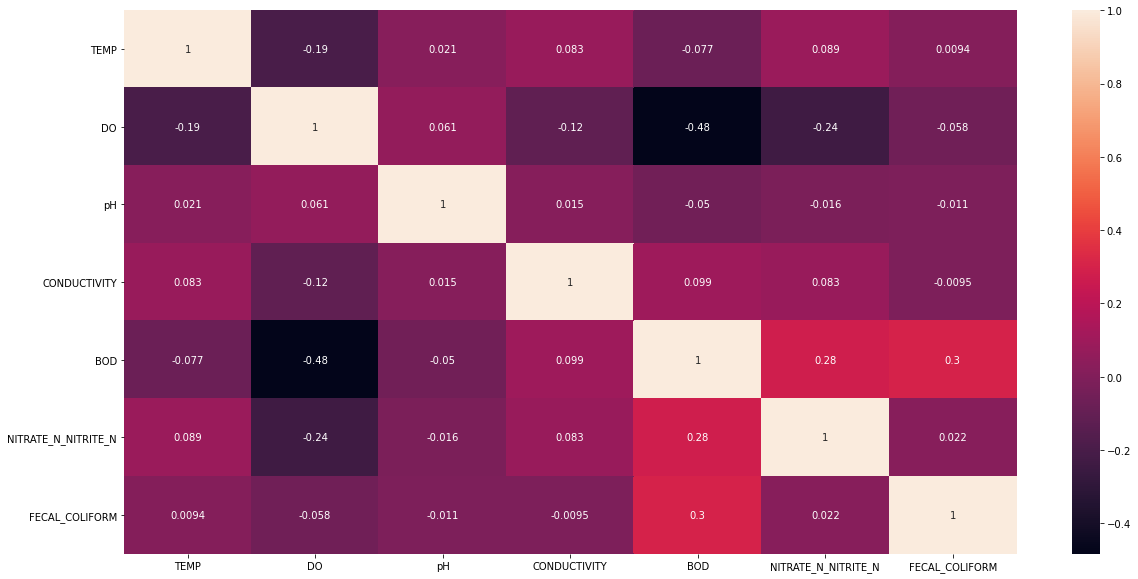

In [55]:
#plotting the heatmap for correlation
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

## 6. Feature Engineering <a class="anchor" id="FeatureEng" ></a>

To train a model we need what we have to predict which is not in data. So we have to calculate water quality index which will be used to generate the water quality of the data

In [25]:
df.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0


To calculate for Water Quality Index using Brown et al WQI formula, one needs the water quality index of individual parameters. Summation of the individual parameters gives the total WQI.
Therefore for all parameters except PH and DO, the formula is:
(parameter_data_recorded / parameter_standard_value) x 100 x parameter_weight
For PH the formula is:
(abs(pH_data_recorded - 7)/1.5) x pH_weight
For DO the formula is:
(abs((DO_data_recorded - 14)/-8) x DO_weight
NOTE: Weights and standard used according to WHO/BIS/ICMR standards

In [26]:
#calculating individual water quality index
df.insert(7,"Temp_WI", 0.05 * 100 * (df['TEMP']/30), True)
df.insert(7,"EC_WI", 0.01 * 100 * (df['CONDUCTIVITY']/300), True)
df.insert(7,"BOD_WI", 0.27 * 100 * (df['BOD']/6), True)
df.insert(7,"NITRATE_WI", 0.04 * 100 * (df['NITRATE_N_NITRITE_N']/45), True)
df.insert(7,"FC_WI", 0.16 * 100 * (df['FECAL_COLIFORM']/10), True)
df.insert(7,"PH_WI",(abs(df['pH'] - 7)/1.5)* 0.19, True)
df.insert(7,"DO_WI",(abs(df['DO'] - 14)/8)* 0.27, True)
df.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,DO_WI,PH_WI,FC_WI,NITRATE_WI,BOD_WI,EC_WI,Temp_WI
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,0.256500,0.139333,4.8,0.177778,15.30,2.450000,4.866667
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,0.270000,0.126667,115.2,0.177778,13.95,0.900000,4.083333
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,0.286875,0.101333,94.4,0.800000,18.90,1.183333,4.300000
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,0.286875,0.101333,144.0,0.315556,25.20,1.236667,4.133333
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,0.280125,0.114000,72.0,0.239111,14.40,0.980000,4.283333


In [27]:
#Sum of the water quality index for individual parameters
df['WQI'] = df['DO_WI'] + df['PH_WI'] + df['FC_WI'] + df['NITRATE_WI'] + df['BOD_WI'] + df['EC_WI'] + df['Temp_WI']

In [28]:
df.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,DO_WI,PH_WI,FC_WI,NITRATE_WI,BOD_WI,EC_WI,Temp_WI,WQI
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,0.256500,0.139333,4.8,0.177778,15.30,2.450000,4.866667,27.990278
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,0.270000,0.126667,115.2,0.177778,13.95,0.900000,4.083333,134.707778
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,0.286875,0.101333,94.4,0.800000,18.90,1.183333,4.300000,119.971542
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,0.286875,0.101333,144.0,0.315556,25.20,1.236667,4.133333,175.273764
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,0.280125,0.114000,72.0,0.239111,14.40,0.980000,4.283333,92.296569


In [29]:
#setting up data to predict Water Quality Index
df_new = df[['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM','WQI']]
df_new

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,WQI
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,27.990278
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,134.707778
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,119.971542
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,175.273764
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,92.296569
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,19.612222
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,17.864167
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,18.310083
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,30.735903


## 7. Model Creation <a class="anchor" id="ModelC" ></a>
Now we apply machine learning algorithms to predict the data.

In [30]:
#splitting data. 80% was used in training and 20% used in testing
features = df_new.drop('WQI',axis=1)
labels = df_new['WQI']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

#Predicting the water quality Index based on Linear Regression.
Standard scaler was used to normalise the data

In [31]:
import joblib

pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
print("score is " + str(score))
# The mean squared error
print("Mean squared error: %.2f" % np.mean((pipe.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % pipe.score(X_test,y_test))
preds = pipe.predict(X_test)
joblib.dump(pipe, 'QualityIndex.pkl')

score is 0.9999999999998566
Mean squared error: 0.00
Variance score: 1.00


['QualityIndex.pkl']

## 7.1 Water Quality Prediction <a class="anchor" id="Prediction" ></a>
After predicting water quality index, now we classify water on the basis of its WQI and predict its quality.

In [32]:
#classifying the water on the basis of their water quality index.
df['Quality']=df.WQI.apply(lambda x:('Excellent' if (50>=x>=0)  
                                 else('Good' if  (100>=x>=51) 
                                      else('Poor' if (150>=x>=101)
                                          else('Very Poor' if (200>=x>=151) 
                                              else 'Unsuitable')))))

In [33]:
#encoding the string Quality which is string to numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Quality_le'] = le.fit_transform(df.Quality.values)

In [34]:
df.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,DO_WI,PH_WI,FC_WI,NITRATE_WI,BOD_WI,EC_WI,Temp_WI,WQI,Quality,Quality_le
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,0.256500,0.139333,4.8,0.177778,15.30,2.450000,4.866667,27.990278,Excellent,0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,0.270000,0.126667,115.2,0.177778,13.95,0.900000,4.083333,134.707778,Poor,2
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,0.286875,0.101333,94.4,0.800000,18.90,1.183333,4.300000,119.971542,Poor,2
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,0.286875,0.101333,144.0,0.315556,25.20,1.236667,4.133333,175.273764,Very Poor,4
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,0.280125,0.114000,72.0,0.239111,14.40,0.980000,4.283333,92.296569,Good,1


In [37]:
#setting up data to predict water quality 
df_new2 = df[['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM','WQI','Quality_le']]
df_new2

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,WQI,Quality_le
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,27.990278,1
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,134.707778,3
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,119.971542,3
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,175.273764,3
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,92.296569,4
...,...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,19.612222,0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,17.864167,0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,18.310083,0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,30.735903,1


In [38]:
#Predicting water quality: splitting data. 80% for training and 20% for testing
features2 = df_new2.drop('Quality_le',axis=1)
labels2 = df_new2['Quality_le']
X_train1, X_test1, y_train1, y_test1 = train_test_split(features2, labels2, test_size=0.2, random_state=0)

## 7.2 Training and Testing Different Models <a class="anchor" id="TnTModels" ></a>

Different models were tested to finally come out with the Best Model.
In using the pipeline with StandardScaler as the normalizer, GradientBoostingClassifier had the greatest
score of 0.99. Almost a perfect prediction

In [39]:
import joblib

pipe1 = Pipeline([('scaler', StandardScaler()), ('XGB',GradientBoostingClassifier())])
pipe1.fit(X_train1, y_train1)
score = pipe1.score(X_test1, y_test1)
print("score is " + str(score))
# The mean squared error
print("Mean squared error: %.2f" % np.mean((pipe1.predict(X_test1) - y_test1) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % pipe1.score(X_test1, y_test1))
preds = pipe1.predict(X_test1)
print(classification_report(y_test1, preds))
cm = confusion_matrix(y_test1, preds)
print(cm)
joblib.dump(pipe1, 'Quality.pkl')

score is 0.9905660377358491
Mean squared error: 0.04
Variance score: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        15
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        69
           4       0.75      1.00      0.86         3

    accuracy                           0.99       106
   macro avg       0.95      0.98      0.96       106
weighted avg       0.99      0.99      0.99       106

[[ 9  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  9  0  1]
 [ 0  0  0 69  0]
 [ 0  0  0  0  3]]


['Quality.pkl']

Without using the pipeline, data was scaled separately. we then trained more than one classifer of which GradientBoostingClassifier and RandomForest had high scores. The models we chose were selected because they support multiclass classification in our case

In [40]:
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [41]:
filterwarnings('ignore')
models =[("LR", LogisticRegression()),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=30)),
         ('RF',RandomForestClassifier()),('XGB',GradientBoostingClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train1, y_train1)
    model_results = model.predict(X_test1)
    score = precision_score(y_test1, model_results,average='weighted')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [42]:
finalResults

[('XGB', 0.9929245283018868),
 ('RF', 0.9617179741807349),
 ('KNN', 0.5884433962264151),
 ('SVC', 0.5167815674891146),
 ('LR', 0.4971412235563179)]

## 8. Using Saved models to predict water quality <a class="anchor" id="SavedModels" ></a>

In [43]:
#Read test_set data
data = pd.read_csv('test_set.csv')

In [44]:
data.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM
0,37.2,5.8,6.4,650,2.1,2.3,2


In [ ]:
data.dtypes

In [45]:
Temp_WI = 0.05 * 100 * (data['TEMP']/30)
EC_WI = 0.01 * 100 * (data['CONDUCTIVITY']/300)
BOD_WI = 0.27 * 100 * (data['BOD']/6)
NITRATE_WI = 0.04 * 100 * (data['NITRATE_N_NITRITE_N']/45)
FC_WI = 0.16 * 100 * (data['FECAL_COLIFORM']/10)
PH_WI = (abs(data['pH'] - 7)/1.5)* 0.19
DO_WI = (abs(data['DO'] - 14)/8)* 0.27

data['WQI'] = DO_WI + PH_WI + FC_WI + NITRATE_WI + BOD_WI + EC_WI + Temp_WI

In [46]:
data.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,WQI
0,37.2,5.8,6.4,650,2.1,2.3,2,21.573861


In [47]:
#Loading the saved model with joblib
import joblib
pipes = joblib.load('QualityIndex.pkl')

In [48]:
#New data to predict
pred_cols = list(data.columns.values)[:-1]

In [49]:
pred_cols

['TEMP',
 'DO',
 'pH',
 'CONDUCTIVITY',
 'BOD',
 'NITRATE_N_NITRITE_N',
 'FECAL_COLIFORM']

In [50]:
# apply the whole pipeline to data
pred = pd.Series(pipes.predict(data[pred_cols]))
print(pred)

0    21.45651
dtype: float64


In [51]:
data.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,WQI
0,37.2,5.8,6.4,650,2.1,2.3,2,21.573861


In [52]:
#classifying the water on the basis of their water quality index.
data['Quality']=data.WQI.apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=26) 
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76) 
                                              else 'Unsuitable')))))

In [53]:
data.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,WQI,Quality
0,37.2,5.8,6.4,650,2.1,2.3,2,21.573861,Excellent


In [54]:
#encoding the string Quality which is string to numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Quality_le'] = le.fit_transform(data.Quality.values)

In [55]:
data.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,WQI,Quality,Quality_le
0,37.2,5.8,6.4,650,2.1,2.3,2,21.573861,Excellent,0


In [56]:
data = data.drop('Quality', axis = 1)

In [57]:
pipes = joblib.load('Quality.pkl')

In [58]:
pred_cols = list(data.columns.values)[:-1]
pred_cols

['TEMP',
 'DO',
 'pH',
 'CONDUCTIVITY',
 'BOD',
 'NITRATE_N_NITRITE_N',
 'FECAL_COLIFORM',
 'WQI']

In [59]:
pred = pd.Series(pipes.predict(data[pred_cols]))
pred = le.fit_transform(pred.values)
print(pred)

[0]
